## run the game and generate csv file
- .py files are imported and run
- export csv file for further processing and visuaization

100%|██████████| 3000/3000 [04:39<00:00, 10.73it/s]


{'disconnected': [0.25049999999999667,
  0.2546249999999966,
  0.4933749999999956,
  0.5958749999999939,
  0.6278749999999927,
  0.660749999999994,
  0.682124999999994,
  0.7018749999999935,
  0.7273749999999928,
  0.7374999999999935,
  0.7533749999999947,
  0.7654999999999945,
  0.7692499999999943,
  0.7807499999999935,
  0.7889999999999948,
  0.8041249999999934,
  0.8067499999999944,
  0.8139999999999945,
  0.8118749999999957,
  0.8242499999999945,
  0.8248749999999946,
  0.8268749999999941,
  0.831374999999994,
  0.840624999999995,
  0.8376249999999942,
  0.8432499999999937,
  0.8438749999999944,
  0.8501249999999944,
  0.8522499999999945,
  0.8559999999999943,
  0.8618749999999945,
  0.862499999999994,
  0.8624999999999945,
  0.8712499999999944,
  0.8662499999999935,
  0.8714999999999944,
  0.8747499999999931,
  0.8776249999999948,
  0.8818749999999946,
  0.8832499999999958,
  0.8813749999999959,
  0.883249999999994,
  0.8862499999999953,
  0.8873749999999957,
  0.8917499999999956,

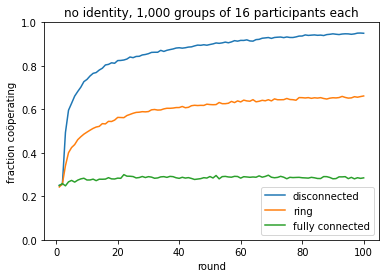

In [9]:
import study_modified as sm
import seaborn as sns
sm.main()

In [ ]:
import study_partial_feedback as spf
import seaborn as sns
spf.main()

In [ ]:
import study_wopp_feedback as swf
import seaborn as sns
swf.main()

## Data import and parsing

In [26]:
#import and parse the data generated in 
import pandas
csv = pandas.read_csv('/Users/cmu-work/Code/DDM_rep/DDM OG/log-2022-03-01.csv', sep=',', header=0)
df_fully_connected = csv[csv['network'] == 'fully-connected']
df_disconnected = csv[csv['network'] == 'disconnected']
df_ring = csv[csv['network'] == 'ring']
# csv_apples.to_csv('apples.csv', index=False, sep=',')

In [24]:
# figure out how many rep each round
df_disconnected.loc[df_disconnected['round'] == 1]


,participant cluster,round,1-2-choice
46,0,1,BA
48,2,1,BB
49,4,1,BB
50,1,1,AB
52,0,1,BA
...,...,...,...
797080,999,1,BA
797086,999,1,AB
797090,999,1,AB
797096,999,1,BB


### Fully connected network

In [27]:
df_fully_connected['1-2-choice'] = df_fully_connected['player 1 choice'].astype(str) + df_fully_connected['player 2 choice'].astype(str)
df_fully_connected = df_fully_connected[["participant cluster", "round","1-2-choice"]]

participant_round_counts = df_fully_connected.groupby(['1-2-choice','round']).count().reset_index()
#participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-choice'])/8000
sns.lineplot(data=pvt).set(title='Fully connected',ylim=(0, 1))


/Users/cmu-work/opt/anaconda3/envs/DDML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Disconnected Network

/Users/cmu-work/opt/anaconda3/envs/DDML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0.5, 1.0, 'Disconnected'), (0.0, 1.0)]

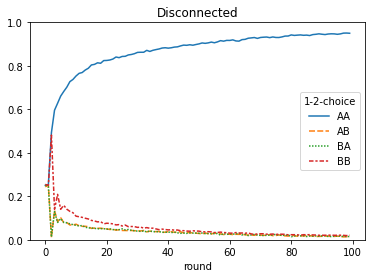

In [29]:
df_disconnected['1-2-choice'] = df_disconnected['player 1 choice'].astype(str) + df_disconnected['player 2 choice'].astype(str)
df_disconnected = df_disconnected[["participant cluster", "round","1-2-choice"]]

participant_round_counts = df_disconnected.groupby(['1-2-choice','round']).count().reset_index()
#participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-choice'])/8000
sns.lineplot(data=pvt).set(title='Disconnected',ylim=(0, 1))

### Ring Network

/Users/cmu-work/opt/anaconda3/envs/DDML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[Text(0.5, 1.0, 'Ring'), (0.0, 1.0)]

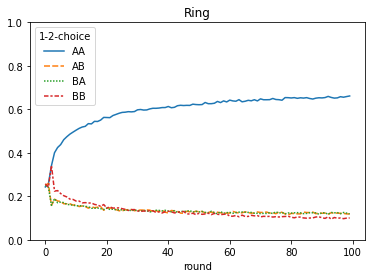

In [30]:
df_ring['1-2-choice'] = df_ring['player 1 choice'].astype(str) + df_ring['player 2 choice'].astype(str)
df_ring = df_ring[["participant cluster", "round","1-2-choice"]]

participant_round_counts = df_ring.groupby(['1-2-choice','round']).count().reset_index()
#participant_round_counts.rename(colums={'1-2-choice': 'choice of agent A and B'}, inplace=True)

pvt = pandas.pivot_table(participant_round_counts, values='participant cluster', index='round',columns=['1-2-choice'])/8000
sns.lineplot(data=pvt).set(title='Ring',ylim=(0, 1))

## Archive 
experiment for building the visualization
experiment with the original .py file

In [ ]:
df_fully_connected.groupby('round')
df_fully_connected

In [ ]:
frequency = df_fully_connected[['round','1-2-choice']].value_counts(normalize =True)
#https://thispointer.com/pandas-get-frequency-of-a-value-in-dataframe-column-index-find-its-positions-in-python/
# https://sparkbyexamples.com/pandas/pandas-count-frequency-value-occurs-in-dataframe-column/

In [ ]:
frequency

In [ ]:
frequency_df = frequency.to_frame(name="freq")
frequency_df.sort_values('round')
frequency_df

In [ ]:
df_fully_connected['freq_count'] = df.groupby(['round','1-2-choice'])[['round','1-2-choice']].transform('count')

In [ ]:
type(frequency)

### Test OG

In [ ]:
import study

In [ ]:
study.main()

In [ ]:
import study_wopp as sw

In [ ]:
sw.main()

In [ ]:
import study_wopp_feedback as swf
swf.main()